# Versuch einen Decision Tree für Klassifizierung von Bildern zu verwenden
## Imports

Bitte installieren Sie zuvor Python-OpenCV (am besten mit PIP, da Anaconda gerne fehlschlägt).
Zudem sollte das [FACD_Dataset](https://wtwilsonsun.github.io/FACD/) heruntergeladen und entpackt sein.

In [1]:
from sklearn import tree
import cv2 
import os
import glob
import numpy as np

## Test mit zwei Klassen
### Laden und Formatieren der Bilder
Zum Trainieren des DecisionTrees wird ein Auszu des gesamten FACD-Datensatzes verwendet. 
Hierzu werden 32 Originalbilder und die dazugehörigen Bilder des Filters "Amaro" verwendet.
Zum Trainieren werden alle Bilder auf ein Format von 244 x 244 gebracht und anschließend in einen 1D-Vector gebracht.

In [2]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
data_origin = []
data_amaro = []

shape = (244,244)

for f1 in files_origin:
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:   
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())
    


### Erstellen des DecisionTrees

In [3]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 

X = np.concatenate((data_amaro, data_origin))
print(X.shape)
y = ["amaro" for i in range(32)] + ["origin" for i in range(32)]

clf = tree.DecisionTreeClassifier()
clf.fit(X, y) 

(64, 59536)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Anzeige des Trees

[Text(167.4, 163.07999999999998, 'X[41477] <= 2.0\ngini = 0.5\nsamples = 64\nvalue = [32, 32]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

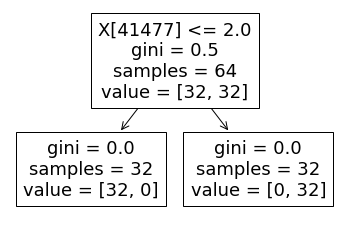

In [4]:
tree.plot_tree(clf)

### Laden von Testbildern
Zum Testen wird ein original Bild und das passende gefilterte Bild verwendet, welches nicht zu den Trainingsdaten gehört.

In [5]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg", cv2.IMREAD_GRAYSCALE)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg", cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, shape)
original = original.flatten()

print("Prediction for amaro picture:", clf.predict([amaro]))
print("Prediction for origin picture:", clf.predict([original]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']


Das Ergebnis für dieser Erkennung sieht zunächst gut aus. 
Die zwei Testbilder werden der richtigen Klasse zugeordnet. 
Nun soll es mit drei Klassen probiert werden, da die "gefilterten"-Bilder immer einen schwarzen Rand besitzen und hierdurch eine Zuordnung erfolgen könnte.

## Test mit einer dritten Klasse
### Hinzufügen einer dritten Klasse

In [6]:
img_dir_lofi = "filter_decision_tree/lofi"
data_path_lofi = os.path.join(img_dir_lofi,'*g')
files_lofi = glob.glob(data_path_lofi)
data_lofi = []

for f1 in files_lofi:
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 

### Erstellen des DecisionTrees

[Text(186.0, 195.696, 'X[42458] <= 2.5\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(148.8, 152.208, 'X[44117] <= 88.0\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(74.4, 108.72, 'X[23717] <= 147.5\ngini = 0.285\nsamples = 29\nvalue = [5, 24, 0]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(111.60000000000001, 65.232, 'X[33415] <= 13.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(223.20000000000002, 108.72, 'X[15149] <= 13.5\ngini = 0.353\nsamples = 35\nvalue = [27, 8, 0]'),
 Text(186.0, 65.232, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(260.40000000000003, 65.232, 'X[45881] <= 134.0\ngini = 0.18\nsamples = 30\nvalue = [27, 3, 0]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(297.6, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]')

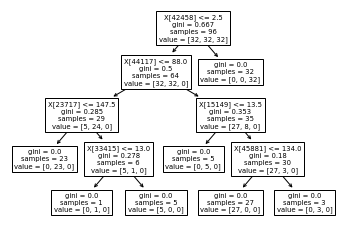

In [7]:
data_lofi = np.array(data_lofi)

X_new = np.concatenate((data_amaro, data_origin, data_lofi))
y_new = ["amaro" for i in range(32)] + ["origin" for i in range(32)] + ["lofi" for i in range(32)]

clf_new = tree.DecisionTreeClassifier()
clf_new.fit(X_new, y_new) 
tree.plot_tree(clf_new)

### Prediction des neuen Trees

In [8]:
lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg", cv2.IMREAD_GRAYSCALE)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_new.predict([amaro]))
print("Prediction for origin picture:", clf_new.predict([original]))
print("Prediction for lofi picture:", clf_new.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['amaro']


Wie zu sehen ist, klappt die Klassifikation in diesem Fall nicht mehr. :(

Als nächstes probieren wir es mit mehr Testdaten aus.

## Test mit allen FACD-Daten der ausgewählten Klassen

In [9]:
img_dir_amaro = "FACD_image/Amaro"
img_dir_origin = "FACD_image/Original"
img_dir_origin = "FACD_image/Lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

test_image= "601122" #ignore this picture during fit phase

for f1 in files_origin:
    if test_image in f1:
        continue
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    if test_image in f1:
        continue
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    if test_image in f1:
        continue
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 

(2590, 59536)


[Text(139.42518697820037, 212.71304347826086, 'X[56974] <= 10.5\ngini = 0.512\nsamples = 2590\nvalue = [1279, 32, 1279]'),
 Text(16.56400742115028, 203.2591304347826, 'X[35180] <= 223.0\ngini = 0.113\nsamples = 354\nvalue = [16, 5, 333]'),
 Text(13.251205936920224, 193.80521739130435, 'X[2508] <= 0.5\ngini = 0.083\nsamples = 348\nvalue = [10, 5, 333]'),
 Text(6.625602968460112, 184.3513043478261, 'X[5970] <= 100.0\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(3.312801484230056, 174.89739130434782, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(9.938404452690168, 174.89739130434782, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(19.876808905380337, 184.3513043478261, 'X[24845] <= 224.0\ngini = 0.063\nsamples = 343\nvalue = [6, 5, 332]'),
 Text(16.56400742115028, 174.89739130434782, 'X[13820] <= 229.0\ngini = 0.046\nsamples = 340\nvalue = [3, 5, 332]'),
 Text(13.251205936920224, 165.44347826086957, 'X[35211] <= 11.5\ngini = 0.035\nsamples = 338\nvalue = [1, 5, 332]'),

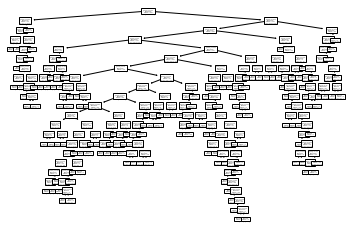

In [10]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin,data_lofi))
print(X_full.shape)

y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

clf_full = tree.DecisionTreeClassifier()
clf_full.fit(X_full, y_full) 
tree.plot_tree(clf_full)

In [11]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg", cv2.IMREAD_GRAYSCALE)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg", cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, shape)
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg", cv2.IMREAD_GRAYSCALE)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_full.predict([amaro]))
print("Prediction for origin picture:", clf_full.predict([original]))
print("Prediction for lofi picture:", clf_full.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['origin']


Wie zu sehen ist, wird der Entscheidungsbaum immer größer und komplexer. 
Leider haben die zusätzlichen Daten keine korrekte vorhersage gebracht. 

## Test mit Farbbildern
Im letzten Schritt soll nun probiert werden, ob eine Verbesserung mit RGB-Bildern erzielt werden kann.
Um den Trainingsvorgang zu beschleunigen werden wieder die ursprünglichen Trainingsbilder benutzt.

### Erstellen des Modells

(96, 178608)


[Text(200.88000000000002, 195.696, 'X[46104] <= 3.0\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(133.92000000000002, 152.208, 'X[97374] <= 29.5\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(200.88000000000002, 108.72, 'X[165534] <= 105.5\ngini = 0.381\nsamples = 43\nvalue = [32, 11, 0]'),
 Text(133.92000000000002, 65.232, 'X[148877] <= 19.5\ngini = 0.157\nsamples = 35\nvalue = [32, 3, 0]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(267.84000000000003, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(267.84000000000003, 152.208, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

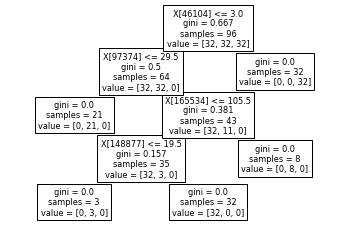

In [12]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
img_dir_lofi = "filter_decision_tree/lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

for f1 in files_origin:
    origin = cv2.imread(f1)
    origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    amaro = cv2.imread(f1)
    amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    lofi = cv2.imread(f1)
    lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 
    
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin,data_lofi))
print(X_full.shape)

y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

clf_full = tree.DecisionTreeClassifier()
clf_full.fit(X_full, y_full) 
tree.plot_tree(clf_full)

### Prediction

In [13]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg")
amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, shape)
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg")
lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_full.predict([amaro]))
print("Prediction for origin picture:", clf_full.predict([original]))
print("Prediction for lofi picture:", clf_full.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['amaro']


Wie zu sehen ist, gibt es auch bei den farbigen Bildern keine Verbesserung.
Die letzte Verbesserung, die in diesem Notebook getestet werden soll, ist die Reduzierung der Features. 
Demzufolge werden die Bilder weiter verkleinert.

## Reduzierung der Features

(96, 44652)


[Text(200.88000000000002, 195.696, 'X[34404] <= 0.5\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(133.92000000000002, 152.208, 'X[18683] <= 17.5\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 0]'),
 Text(200.88000000000002, 108.72, 'X[43212] <= 97.5\ngini = 0.397\nsamples = 44\nvalue = [32, 12, 0]'),
 Text(133.92000000000002, 65.232, 'X[42282] <= 27.0\ngini = 0.198\nsamples = 36\nvalue = [32, 4, 0]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(267.84000000000003, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(267.84000000000003, 152.208, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

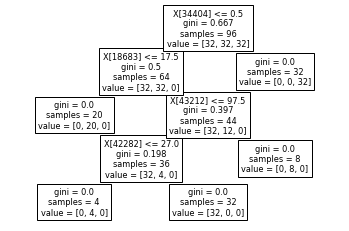

In [14]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
img_dir_lofi = "filter_decision_tree/lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

# Reduzierung der Features
shape = (122,122)

for f1 in files_origin:
    origin = cv2.imread(f1)
    origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    amaro = cv2.imread(f1)
    amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    lofi = cv2.imread(f1)
    lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 
    
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin,data_lofi))
print(X_full.shape)

y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

clf_full = tree.DecisionTreeClassifier()
clf_full.fit(X_full, y_full) 
tree.plot_tree(clf_full)

In [15]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg")
amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, shape)
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg")
lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_full.predict([amaro]))
print("Prediction for origin picture:", clf_full.predict([original]))
print("Prediction for lofi picture:", clf_full.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['lofi']


**Wie zu sehen ist, funktioniert nun die Klassifizierung besser bzw. wurde der richtige Filter (zumindest beim Testbild) richtig vorhergesagt.**